In [12]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# use sklearn to import a dataset
from sklearn.datasets import load_wine

In [13]:
# let's load the dataset
wine = load_wine()

# convert the dataset to a Pandas dataframe
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
# create the column
df["target"] = wine.target

In [14]:
#.head() and .tail() These two allow us to view an arbitrary numbers of rows (by default 5) from the beginning or end of the dataset.
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [15]:
#.shape() is used to understand no.of rows and columns
df.shape

(178, 14)

In [16]:
#.describe() this function provides purely descriptive information(statistics) about dataset
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [17]:
#.info() gives us a shorter summary of our dataset. It returns us information about the data type, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [21]:
# The Goal is to see how the target is a numeric categorical variables that covers the values of 0,1 and 2. These numbers identify the type of wine.
# Let's start cleaning our dataset
# To check for duplicate rows we can use .duplicated().sum() - this will print us the number of duplicated rows in our dataset
df.duplicated().sum()

0

In [22]:
df.rename(columns={"od280/od315_of_diluted_wines": "protein_concentration"}, inplace=True)

In [23]:
# .value_counts() function is useful to understand how many values of a given variable there are in our dataset.
df.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [24]:
# We can also express the data as a percentage by passing normalize=True
df.target.value_counts(normalize=True)

1    0.398876
0    0.331461
2    0.269663
Name: target, dtype: float64

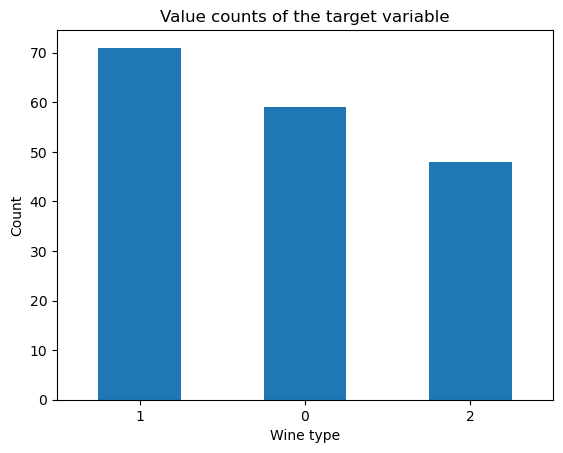

In [25]:
# Let's plot the data with
df.target.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Wine type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()
# Implementation of value_counts() and its plot

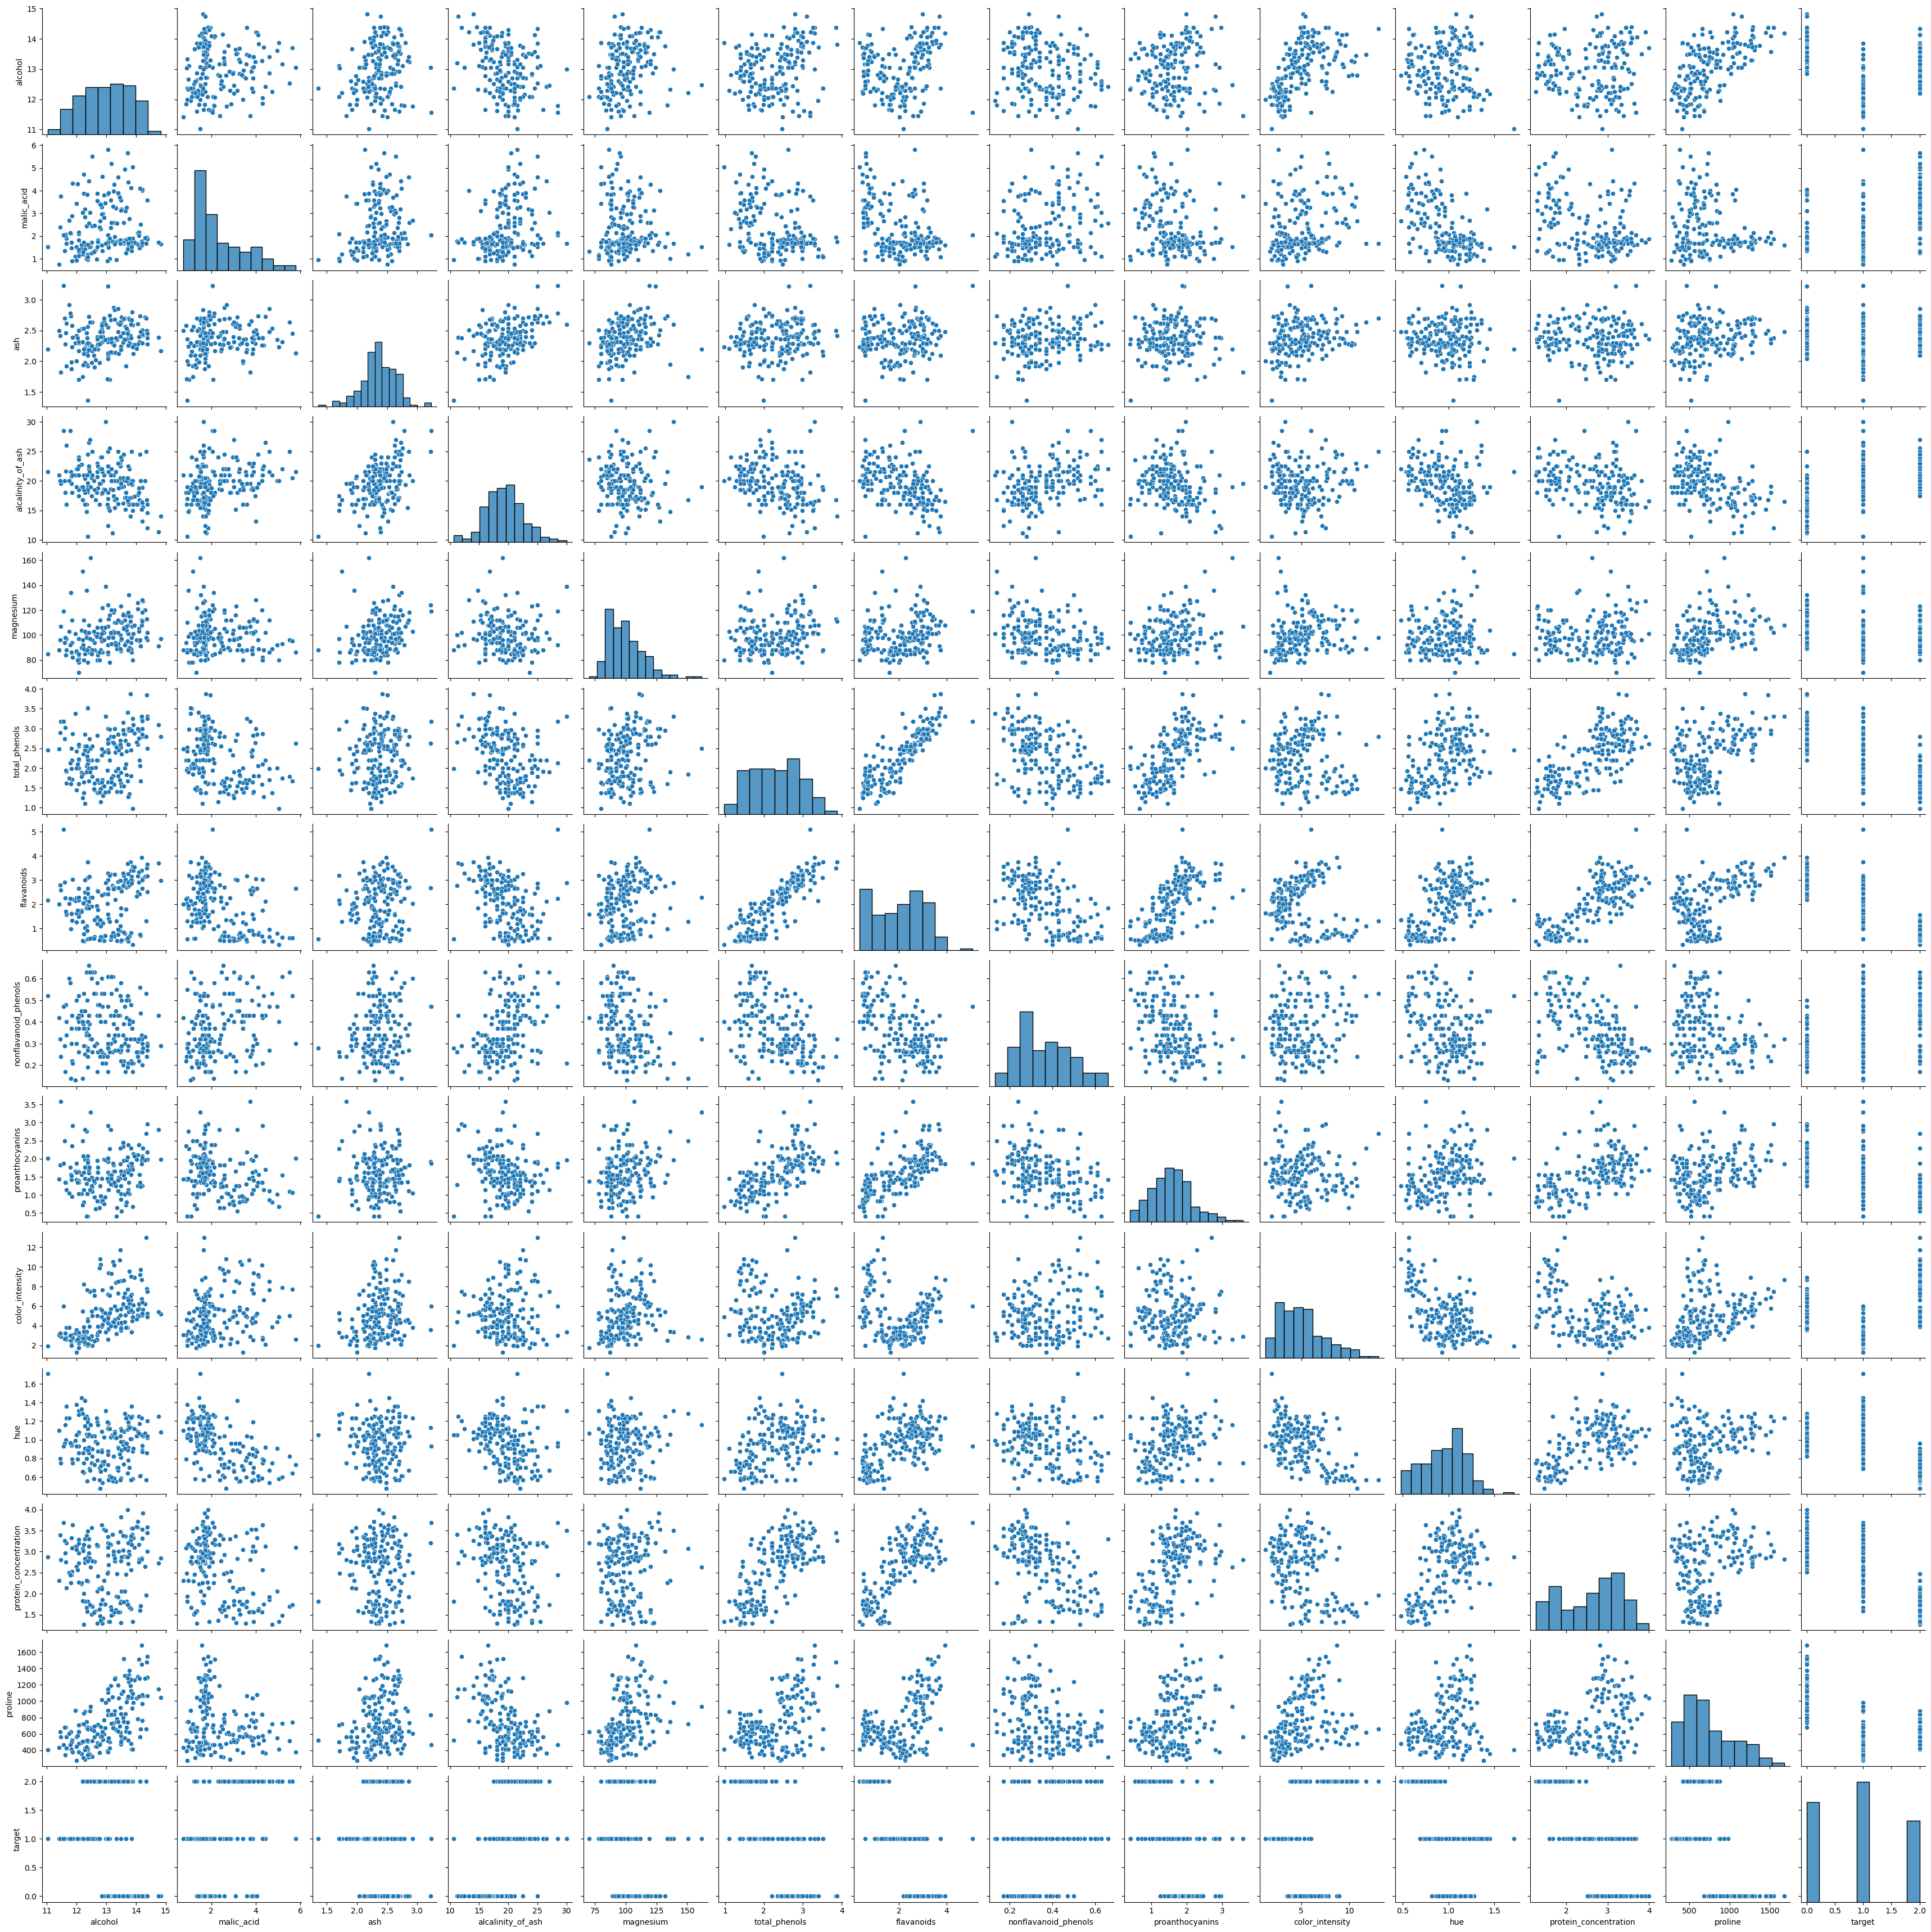

In [28]:
# Now we start exploring relationships with the help of seaborn and pairplot.
sns.pairplot(df)

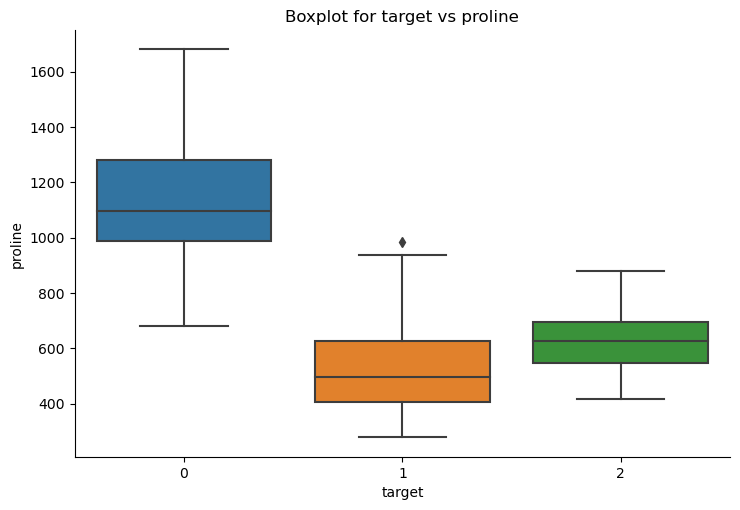

In [29]:
# Let's create a boxplot for alcohal, flavanoids, color_intensity and proline.
sns.catplot(x="target", y="proline", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for target vs proline")
plt.show()

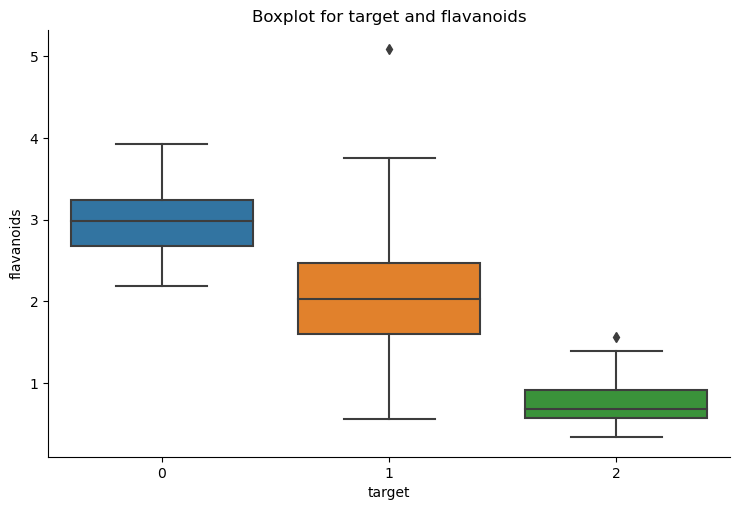

In [30]:
# Let's see flavanoids now
sns.catplot(x="target", y="flavanoids", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for target and flavanoids")
plt.show()

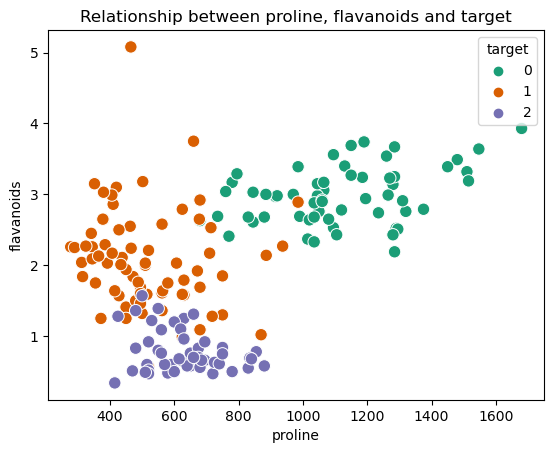

In [31]:
# We can create a scatterplot with seaborn to check the patterns of flavanoids and proline
sns.scatterplot(x="proline", y="flavanoids", hue="target", data=df, palette="Dark2", s=80)
plt.title("Relationship between proline, flavanoids and target")
plt.show()

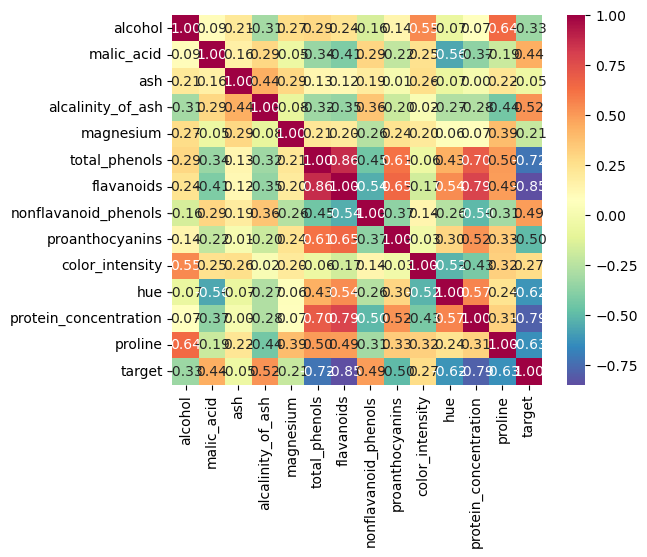

In [32]:
# With the help of heatmap we are going tp create a correlation matrix with pandas and to isolate the most correlated variables 
corrmat = df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()